# Ссылочная модель данных. Модель памяти
Функции могут вызывать внутри себя другие функции, сами себя (рекурсия). При этом внутри функции можно редактировать переменные. Рассмотрим такой пример.


In [1]:
def count(amount, history, limit=100):
    """
    Функция сравнивает траты за месяц вместе с текущей покупкой.
    Если траты превышают лимит, то покупка не пройдет - возвращается False
    """
    history.append(amount)
    return sum(history) <= limit

In [2]:
purchace = 7
hist = [50, 40]
count(purchace, hist)

True

In [3]:
hist

[50, 40, 7]

Переменная `hist` была отредактирована внутри функции, хотя это только возможная покупка, а не уже совершенная. Поэтому в данном случае  в функции логическая ошибка.

Так происходит из-за устройства памяти в питоне. Память самого компьютера линейна - данные в ней лежат сплошным списком  из 0 и 1. При записи списка выделяется память; при присвоении данных переменной в нее записываются не сами данные, а адрес ячейки памяти, где хранятся значения. Поэтому переменная является не списком, а ссылкой на список. **Это ссылочная модель памяти.**

Поэтому правильнее использовавать в функции копию (это создание нового объекта в другом месте памяти) нашего списка. После завершения работы функции копия сотрется, все переменнеы уничтожаться. При этом в переменной `hist` у нас записан адрес на список, переменная используется вне функции, а значит стерта не будет

In [4]:
def count(amount, history, limit=100):
    """
    Функция сравнивает траты за месяц вместе с текущей покупкой.
    Если траты превышают лимит, то покупка не пройдет - возвращается False
    """
    history2 = history.copy()
    history2.append(amount)
    return sum(history2) <= limit

In [5]:
purchace = 7
hist = [50, 40]
count(purchace, hist)

True

In [6]:
hist

[50, 40]

Также решением может быть парадигма **создать и сразу использовать**. В данном случае необходимо к аргументу history прибавить amount не через метод append, а через +. В таком случае список не изменится.

In [7]:
def count(amount, history, limit=100):
    """
    Функция сравнивает траты за месяц вместе с текущей покупкой.
    Если траты превышают лимит, то покупка не пройдет - возвращается False
    """
    return sum(history + [amount]) <= limit

In [8]:
purchace = 7
hist = [50, 40]
count(purchace, hist)
hist

[50, 40]

# Хеш
Это функция, которая берет на вход объект и считает одно число. Для разных объектов это число разное, для одних и тех же объектов оно одно. Свойства:
- быстро считается
- при малейшем изменении объекта хеш функция меняется лавинообразно (абсолютно разные значения хеша)

В питоне для всех неизменяемых объектов можно посчитать его хеш (свойство hasable). К таким объектам относят *множества, строки, кортежи, числа* (их можно складывать, но под капотом складываются копии слагаемых кроме чисел). При добавлении/обращении, например, ключа в словрь, питон кладет туда хеш от объекта. Поэтому обращение по произвольному ключу в питоне быстрое. И именно из-за того, что хеш от одинаковых объектов вернет одинаковый хеш, в словаре в качестве ключа можно использовать только уникальные значения. Во множестве ситуация аналогична - включаются только неизменяемые уникальные объекты.

Хеш функция позволяет организовать быстрый поиск объектов и быстрое обращение к ним. При этом для изменяемых объектов хеш не вычисляется, так как при изменении объекта хеш меняется, а значит за ним надо постоянно следить, что нагружает систему + непонятно, как часто говорить питону, чтобы тот опрашивал объект (между проверками может быть изменение).

# Магические команды для ячеек
Дополнительная функциональность в юпитере, которая меняет поведение кода.


## %time

Вычисляется для выражения справа от него. Время выполнения кода. Линукс системы делят выполнение кода на системные (куда человек не попадет, там используются системные библитеки) и пользовательские.

- CPU time: пользовательское время
- sys: системные библиотеки на уровне ядра (самые глубокие, глубже питона)
- Wall time: сумма с учетом накладных ресурсов

In [9]:
%time 1 * 2

CPU times: total: 0 ns
Wall time: 0 ns


2

In [12]:
%%time
# %%time - на всю ячейку, пишется в самом начале
1 * 2
2 * 3

CPU times: total: 0 ns
Wall time: 0 ns


6

In [13]:
%timeit 2 * 2 # тут 7 запусков
# %timeit - запускает код несколько раз и считает среднее время

# при этом у функции есть доп параметры (см доки)

8.85 ns ± 0.16 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [14]:
# узнаем все магические команды
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [16]:
%load_ext
# есть еще магические команды, которые надо загрузить дополнительно через load_ext

%autoreload 2 #

UsageError: Missing module name.


**`autoreload`** полезен при разработке: он делает так, чтобы все модули переимпортировались перед тем, как запускать код. По умолчанию питон этого не делает: если модуль импортирован, то он просто игнорирует его, то есть: если мы меняем исходный код модуля, то изменения не подтянутся. В случае с autoreload все изменится.

## !терминальная команда
юпитер поймет по '!', что это терминальная команда. Юпитер унаследует то виртуальное окружение и переменные, которые идут от юпитер ноутбука. Если виртуального окржуения нет, то все команды будут выполнятся в системном питоне.

# Kernel
В юпитере можно выполнять команды не только на питоне. За выполнение команд в юпитере отвечает __ядро__. Ядро можно поменять на другое (например где больше пакетов).

Питон как раз проектировался так, что можно было работать с другими языками программирования (например R). Архитектура такова: команды из ячеек отправляются ядру для выполнения, затем ядро отдает результат юпитеру.

# Библиотеки
Это набор готовых функций и переменных. Рассмотрим на примере `datetime` для работы с датами

## datetime

In [17]:
import datetime

In [18]:
christmas = datetime.date(year=2024, month=1, day=7) # если аргументов много, то лучше писать явно
print(christmas, type(christmas))

2024-01-07 <class 'datetime.date'>


In [19]:
# создадим пару дата-время
random_time = datetime.datetime(year=2024, month=1, day=8,
                                hour=18, minute=0, second=56)

In [20]:
random_time

datetime.datetime(2024, 1, 8, 18, 0, 56)

In [21]:
print(f'День {random_time.day}')
print(f'Секунда {random_time.second}')

День 8
Секунда 56


In [22]:
# сложение и вычитание
delta = datetime.timedelta(days=1, seconds=10)
print(random_time - delta)

2024-01-07 18:00:46


Более подробно тут https://pythonworld.ru/moduli/modul-datetime.html

## Collections
Рассмотрим библиотеку collections - содержит дополнительные структуры данных, которые упрощают жизнь. Импортнем Counter, defaultdict:
- defaultdict - словарь, но при обращении к несуществующему ключу создает его, а не выбрасывает ошибку
- Counter - счетчик, считает уникальные элементы и их повторение, а потом создает словарь

In [23]:
from collections import Counter, defaultdict

In [24]:
# создадим словарь с 0 - надо явно передать тип, а не сам объект
d = defaultdict(int)
d

defaultdict(int, {})

In [25]:
d[2] # выдаст 0 вместо ошибки, тк такого ключа нет

0

In [26]:
d # при этом идет запись значения

defaultdict(int, {2: 0})

defaultdict полезен, когда надо, чтобы код был без ошибок, при этом если будет несуществующей ключ, то присваивать ему стандартное значение. Полезно в алгоритмах.

In [27]:
d[2]

0

In [28]:
# Counter на вход принимает список и считает кол-во элементов
lst = [2, 1, 3, 'a', 'b', 'a', None, None]
new_d = Counter(lst)
new_d

Counter({'a': 2, None: 2, 2: 1, 1: 1, 3: 1, 'b': 1})

### правильное использование try-except
Однако Counter это словарь, а значит если в списке будет изменяемый объект, то он может поломаться. Заодном рассмотрим, как правильно использовать связку **`try-except`**: в except лучше писать конкретный тип ошибки

In [29]:
new_lst = [2, 1, 3, 'a', 'b', 'a', None, None, [1, 2]]
try:
    new_d_2 = Counter(new_lst)
except TypeError:
    print('В списке есть изменяемый (unhashable) объект')

В списке есть изменяемый (unhashable) объект


Если предполагается несколько ошибок, то можно делать несколько except-ов. Использовать просто `except:` не рекомендуется

## pandas

### Фильтрация

In [30]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'user_id': [i for i in range(1, 101)],
                   'city': np.random.choice(['moscow', 'london', 'LA', 'madrid'], 100)})

In [31]:
df[df['city'].isin(['london', 'LA'])].head()

,user_id,city
0,1,LA
4,5,london
6,7,LA
9,10,LA
10,11,LA


### Логические операции
В панадасе обозначение логчиеских операций отличается от чистого питона:
- `and` заменяется на амперсанд __&__
- `or` заменяется на __|__
- `not` заменяется на __~__

In [32]:
import pandas as pd
df = pd.DataFrame([(1, 'a'), (2, 'a'), (3, 'b'), (4, 'b')], columns=['number', 'letter'])
df

,number,letter
0,1,a
1,2,a
2,3,b
3,4,b


In [33]:
df[(df['number'] == 1) & (df['letter'] == 'a')]

,number,letter
0,1,a


In [34]:
df[(df['number'] == 1) | (df['letter'] == 'a')]

,number,letter
0,1,a
1,2,a


In [35]:
# в данном случае важно не забывать про скобки - сначала отбираем значения, потом происходит инверсия
df[~(df['number'] == 1)]

,number,letter
1,2,a
2,3,b
3,4,b


In [36]:
df[(~(df['number'] == 1)) & (df['letter'] == 'a')]

,number,letter
1,2,a


### Индексы датафрейма
Индексом в датафрейме может быть не только число, но и строка. Рассмотрим пару примерров работы с ними.

#### df.loc[]
__df.loc[i]__ возвращает серию i-ой строки. Работает

In [37]:
df = pd.DataFrame({'name':['dima', 'vova', 'lena', 'vika'],
                   'age': [30, 35, 23, 34],
                   'salary': [200, 400, 100, 500]})

In [38]:
df

,name,age,salary
0,dima,30,200
1,vova,35,400
2,lena,23,100
3,vika,34,500


In [39]:
df.loc[2] # возвращает серию: индекс - значение

name      lena
age         23
salary     100
Name: 2, dtype: object

In [40]:
df.loc[2]['name']

'lena'

In [41]:
# можно и так
df.loc[2, 'name']

'lena'

#### loc и iloc
loc[] и iloc[] работают одинаково, когда в качестве индекса стоит число. Если будет стоять строка, то в iloc[] надо передавать номер индекса по порядку (даже если там не число), тогда как loc[] работает со значениями индекса, как в датафрейме.

In [42]:
df.iloc[2]

name      lena
age         23
salary     100
Name: 2, dtype: object

In [43]:
# будем работать с копией
copy_df = df.copy().set_index('name')

In [44]:
copy_df

,age,salary
name,,
dima,30,200
vova,35,400
lena,23,100
vika,34,500


In [45]:
copy_df.iloc[1]

age        35
salary    400
Name: vova, dtype: int64

In [46]:
# с iloc нельзя указать все в одной скобке
copy_df.loc['vova', 'age']

35

Так же методы поддерживают срезы

In [47]:
# войдет правая и левая граница
copy_df['dima': 'lena']

,age,salary
name,,
dima,30,200
vova,35,400
lena,23,100


In [48]:
copy_df.loc['dima': 'lena']

,age,salary
name,,
dima,30,200
vova,35,400
lena,23,100


iloc[] работает точно так же, как и список, то есть в случае указания среза правая граница не войдет.

In [49]:
copy_df.iloc[0:3] # правая граница не входит

,age,salary
name,,
dima,30,200
vova,35,400
lena,23,100


In [50]:
# укажем шаг - так же работает и loc
copy_df.iloc[0:3:2]

,age,salary
name,,
dima,30,200
lena,23,100


In [51]:
copy_df.iloc[0:-1:2]

,age,salary
name,,
dima,30,200
lena,23,100


С помощью loc[] можно менять данные в таблице. iloc[] же сделает запись на копии датафрейма, само значение не перезапишется.

In [52]:
copy_df

,age,salary
name,,
dima,30,200
vova,35,400
lena,23,100
vika,34,500


In [53]:
copy_df.loc['vika', 'salary'] = 100
copy_df

,age,salary
name,,
dima,30,200
vova,35,400
lena,23,100
vika,34,100


#### Вставка по условию и создание новой колонки одновременно

In [54]:
df

,name,age,salary
0,dima,30,200
1,vova,35,400
2,lena,23,100
3,vika,34,500


In [55]:
df.loc[(df['salary'] > 200), 'is_high?'] = True
df['is_high?'] = df['is_high?'].fillna(False)
df

,name,age,salary,is_high?
0,dima,30,200,False
1,vova,35,400,True
2,lena,23,100,False
3,vika,34,500,True


#### reset_index()
Сбрасывает индекс. При обычном применении будет сбрасывать индекс у копии (либо нужно указывать аргумент inplace=True)

In [56]:
copy_df.reset_index() # вернется копия

,name,age,salary
0,dima,30,200
1,vova,35,400
2,lena,23,100
3,vika,34,100


In [57]:
copy_df

,age,salary
name,,
dima,30,200
vova,35,400
lena,23,100
vika,34,100


In [58]:
copy_df.reset_index(inplace=True)
copy_df

,name,age,salary
0,dima,30,200
1,vova,35,400
2,lena,23,100
3,vika,34,100


### pd.datetime
Пандасовский datetime, который поддерживает множество функций библиотеки datetime, более гибче. Имеет свой тип данных pd.datetime.

In [59]:
copy_2 = df.copy()
copy_2['time'] = ['2023-12-16', '2024-02-29', '2022-03-16', '2023-05-31']
print(f'''Тип колонки {copy_2['time'].dtypes}''')
# преобразуем строки во время
pd.to_datetime(copy_2['time']) # копия

Тип колонки object


0   2023-12-16
1   2024-02-29
2   2022-03-16
3   2023-05-31
Name: time, dtype: datetime64[ns]

 __.dt__ содержит в себе представления колонки (DatetimeProperties), из которой можно вытаскивать даты.

In [60]:
# можно фильтровать даты по числу/месяцу
copy_2['time'] = pd.to_datetime(copy_2['time'])
copy_2['time'].dt # DatetimeProperties

In [61]:
copy_2[copy_2['time'].dt.month == 12]

,name,age,salary,is_high?,time
0,dima,30,200,False,2023-12-16


In [62]:
# можно группировать
copy_2.groupby(copy_2['time'].dt.day)[['name']].count()

,name
time,
16,2
29,1
31,1


Можно брать всякие представления: год, месяц, день недели и тд

### sample()
Позволяет отбирать определенное число наблюдений из датафрейма. Можно выбирать все время случайными, а можно через фиксацию random seed (зерна генератора случайных величин) для вопроизводимости результата.

In [63]:
copy_2.sample(2, random_state=42)

,name,age,salary,is_high?,time
1,vova,35,400,True,2024-02-29
3,vika,34,500,True,2023-05-31


In [64]:
copy_2

,name,age,salary,is_high?,time
0,dima,30,200,False,2023-12-16
1,vova,35,400,True,2024-02-29
2,lena,23,100,False,2022-03-16
3,vika,34,500,True,2023-05-31


### Графики
График такого вида, как снизу, подходит лучше всего, когда по оси Х будет время

<Axes: title={'center': 'Зависимость зарплаты от возраста'}, xlabel='age', ylabel='salary'>

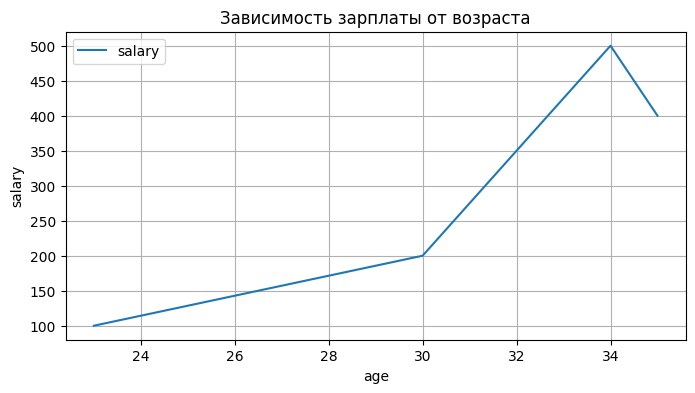

In [65]:
# сначала надо, чтобы в индексе была колонка, которая будет по оси Х
# либо же нужна сортировка значений
for_graph = copy_2[['age', 'salary']].sort_values('age').set_index('age')
for_graph.plot(
              xlabel='age',
              ylabel='salary',
              title='Зависимость зарплаты от возраста',
              grid=True,
              figsize=(8, 4)
          )

In [66]:
df_sample = np.random.normal(1200, 300, 100)

df_s = pd.DataFrame({'user_id': [i for i in range(1, 101)],
                    'gmv': df_sample})

<Axes: >

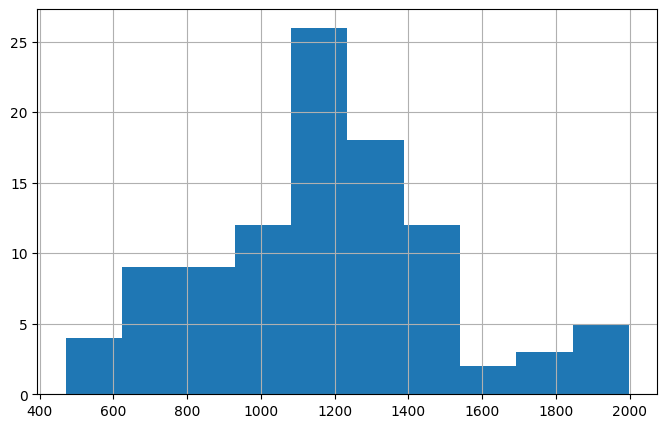

In [67]:
df_s['gmv'].hist(figsize=(8, 5))

сверху можно увидеть объект типа `Axes`. Через него можно добавлять оси, новые графики и тд

Text(0.5, 1.0, 'распределение gmv')

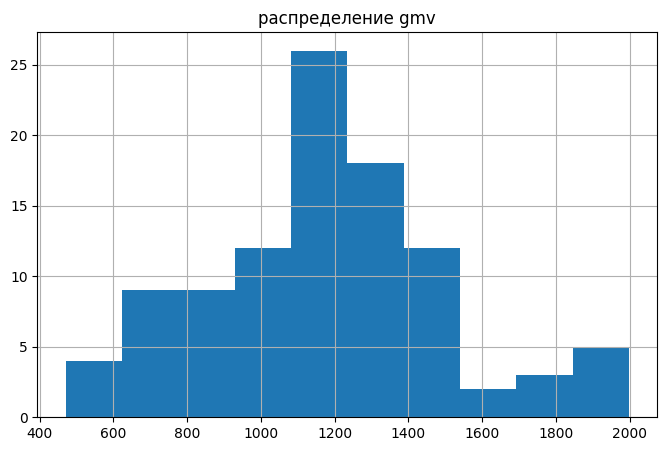

In [68]:
ax = df_s['gmv'].hist(figsize=(8, 5))

# обращаемся к нему через индексы
ax.set_title('распределение gmv')

### Сохранение файлов
Чтобы сохранять фалы в эксель, для этого лучше установить бибилитеку __openpyxl__. При сохранении пандас может использовать 2 библиотеки - __openpyxl__ и __xlsxwriter__. Лучше использовать первую либу при сохранении и открытии файла. Для этого лучше явно указать, какую библитеку для этого использовать - за это отвечает параметр __engine__

In [69]:
# df.to_excel('df.xlsx', engine='openpyxl')
# pd.read_excel('df.xlsx', engine='openpyxl')

## matplotlib
Тесно интегрируется с pandas и numpy. Обычно импортируют не саму бибилитеку, а ее модуль plt

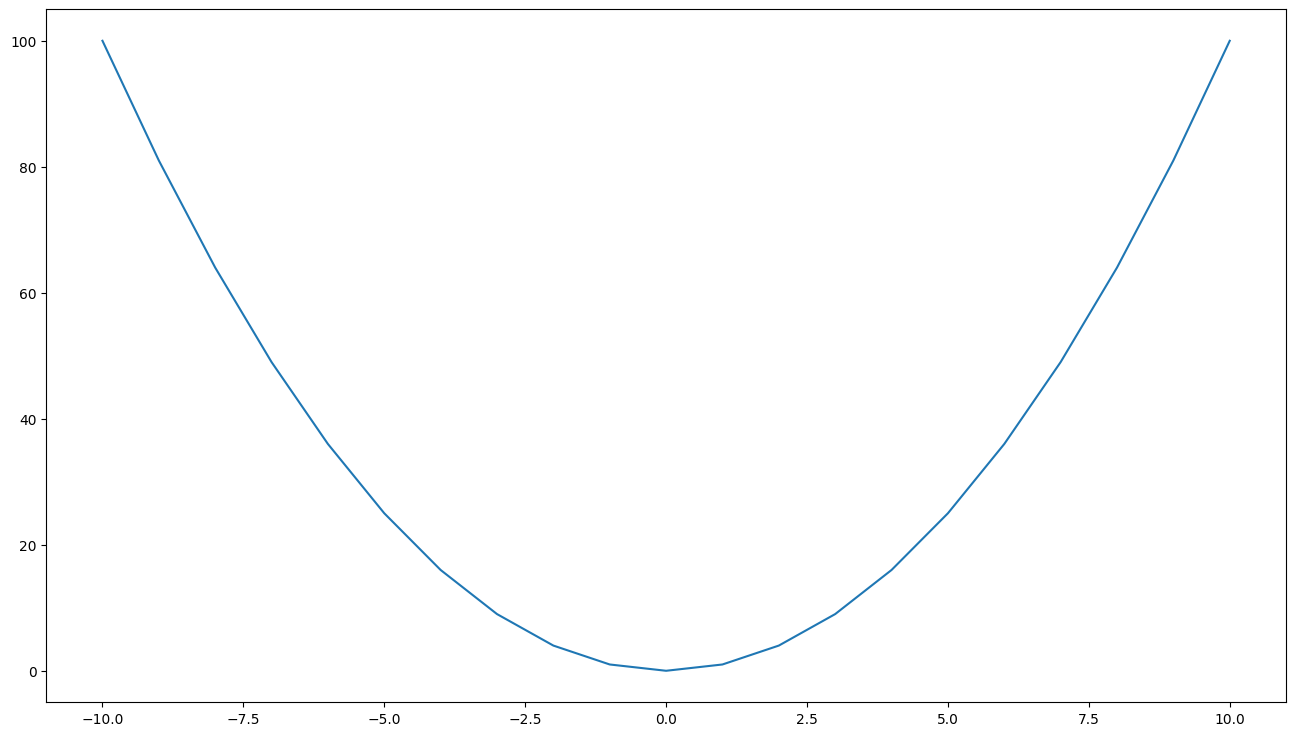

In [70]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 9))
x = np.arange(-10, 11)
y = x ** 2 # np.array поддерживает арифметические операции
plt.plot(x, y); # plot - линия

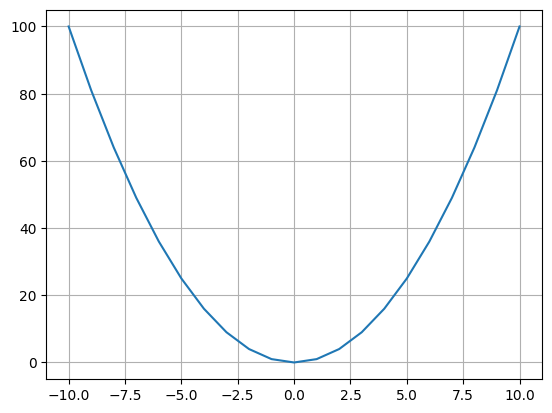

In [71]:
# размер по умолчанию, так как объект графика переопределяется
plt.grid()
x = np.arange(-10, 11)
y = x ** 2
plt.plot(x, y);

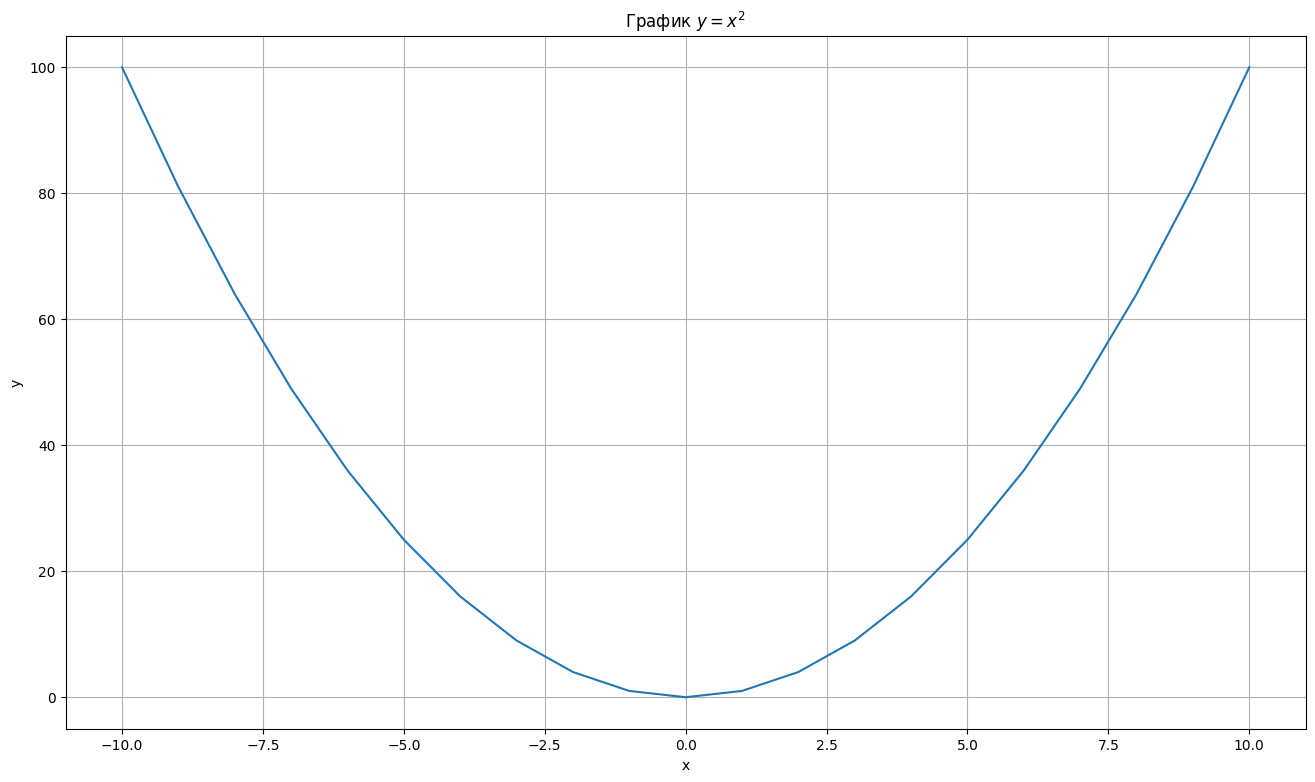

In [72]:
plt.figure(figsize=(16, 9))   # размер, удобнее использовать 16:9
plt.grid()                    # сетка

# подписи поддерживают Latex
plt.title('График $y=x^2$')   # название
plt.xlabel('x')               # подпись оис X
plt.ylabel('y')               # подпись по Y
x = np.arange(-10, 11)
y = x ** 2
plt.plot(x, y);
# plt.savefig('graph.pdf')

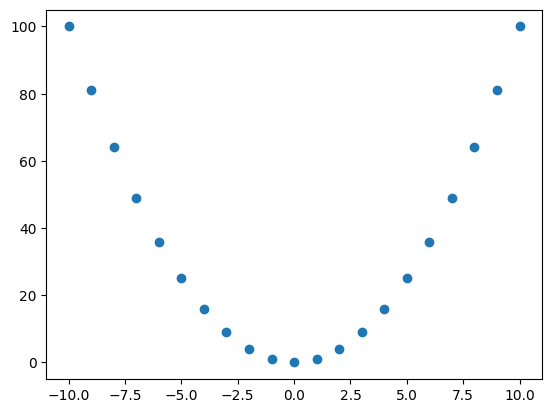

In [73]:
# рисуем точки
plt.scatter(x, y);

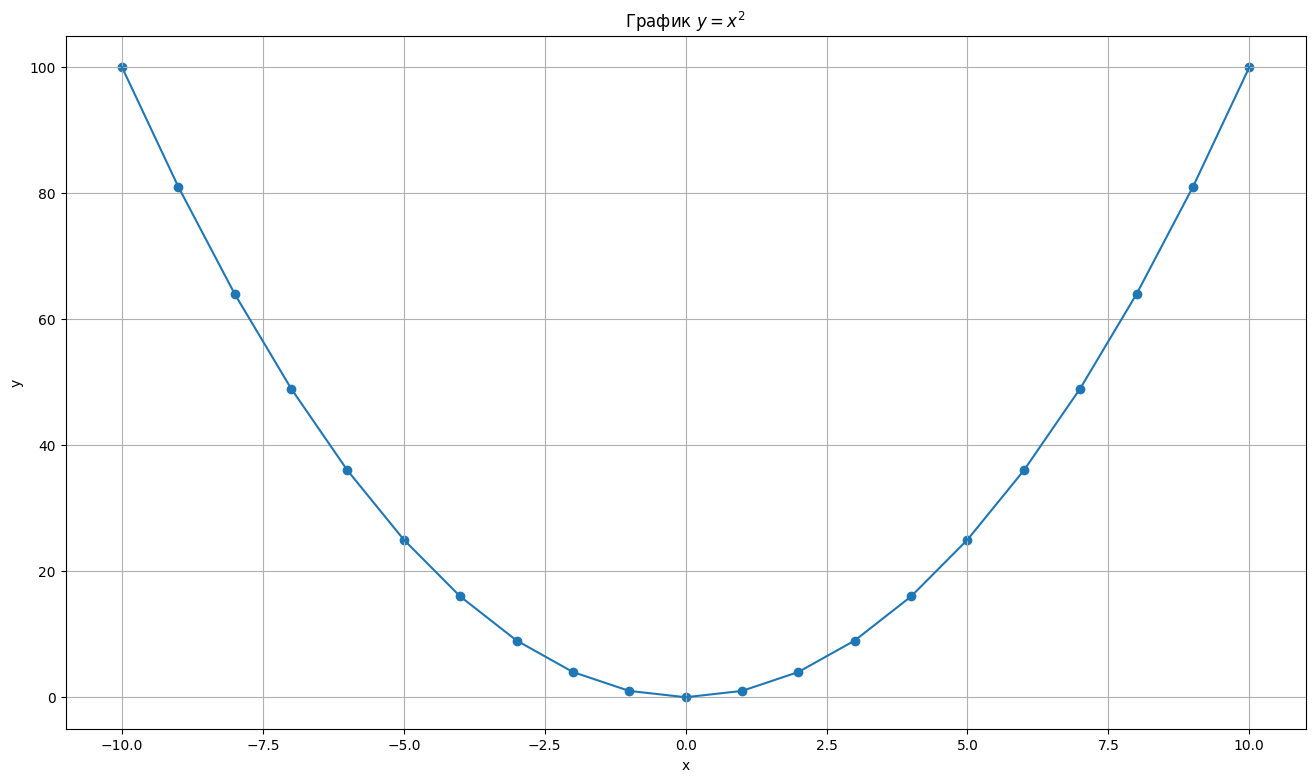

In [74]:
# можно комбинировать
plt.figure(figsize=(16, 9))   # размер, удобнее использовать 16:9
plt.grid()                    # сетка

# подписи поддерживают Latex
plt.title('График $y=x^2$')   # название
plt.xlabel('x')               # подпись оис X
plt.ylabel('y')               # подпись по Y
x = np.arange(-10, 11)
y = x ** 2
plt.plot(x, y)
plt.scatter(x, y);

# ООП
Нужно для описания каких-то объектов по определенному шаблону. Можно хранить описание объекта в виде кортежа и тд, однако не всегда будет очевидно, что именно описывает элемент в кортеже + легко допустить ошибку. При этом код так же должен быть расширяемым, чтобы можно было дописать новые характеристики объекта или изменить старые.
## Класс и объект
Допустим, надо описать характеристики автомобиля: цвет, марку, модель, тип топлива. Хранить это все в виде кортежа будет неудобно по причинам выше, поэтому на помощь приходит ООП, а именно классы.

В класс мы вносим описание машины как сущности, а уже конкретные машины будем описывать по этой сущности.

**Класс** - некоторое объединение свойств объекта (атрибуты) и действий (методов), которые этот объект может совершать. Это некоторый шаблон, по которому создаются объекты - экземпляры.

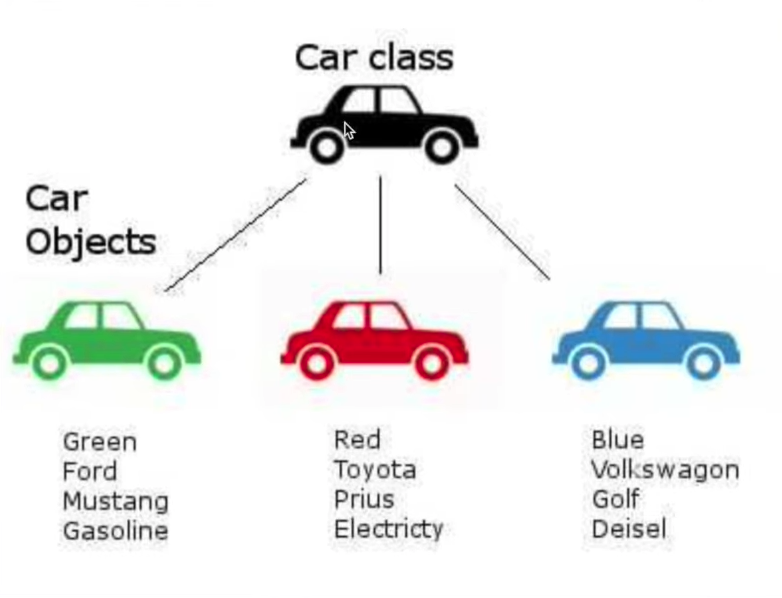

## Свойства объекта: атрибуты

In [75]:
from dataclasses import dataclass

@dataclass
class Auto:
  color: str
  manufacture: str
  model: str
  fuel_type: str

In [76]:
car1 = Auto('black', 'ford', 'focus', 'oil')

In [77]:
car1.color

'black'

In [78]:
# можно создать класс и без dataclass

class AutoShort:

  # __init__() - конструктор класса - объявляет питону, что нужно принять на вход
  # для создания объекта
  def __init__(self, color): # self - сам объект, который будет создан
    print('__init__ was called')
    self.color = color # чтобы цвет был равен цвету на входе

In [79]:
car_2 = AutoShort('red')
car_2.color

__init__ was called


'red'

In [80]:
# меняем свойства (атрибут) экзмепляра
car_2.color = 'blue'

## Функции объекта: методы

In [81]:
class AutoAlarm:
  def __init__(self, color, alarm: str): # можно указать тип аргумента, который ожидается
    self.color = color # чтобы цвет был равен цвету на входе
    self.alarm = alarm

  def alarm_sound(self):
    # внутри функции можем обращаться к свойствам объекта
    print(self.alarm)

In [82]:
car_3 = AutoAlarm('red', 'beeep-beeeep')

In [83]:
car_3

In [84]:
car_3.color

'red'

In [85]:
car_3.alarm_sound()

beeep-beeeep


Почему у нас в методе класса указан аргумент self, тогда как при вызове метода через экзмепляр класса его нет?

Убедимся, что в качестве self автоматом вызовется наш экземпляр:

In [86]:
class AutoAlarm:
  def __init__(self, color, alarm: str): # можно указать тип аргумента, который ожидается
    self.color = color # чтобы цвет был равен цвету на входе
    self.alarm = alarm

  def alarm_sound(self):
    # внутри функции можем обращаться к свойствам объекта
    print(self)
    print(self.alarm)

In [87]:
car_4 = AutoAlarm('green', 'bip')

In [88]:
print(car_4)
car_4.alarm_sound()

bip


Адреса ячеек памяти совпадают, а значит вызывается объект, то есть экзмепляр класса.

Мы создали класс как шаблон для создания объектов - экземпляров класса. Такой подход и называется ООП. Объектом может быть что угодно.

Каждая перемнная в классе называется полем или свойством, каждая функция - методом.

Все в питоне является объектом каких-то классов, у которых есть атрибуты и методы.

## Наследование
Классы можно создавать не с 0, а взять определенные свойства и методы из другого класса. Это и будет наследование. Сделать это просто - нужно добавить класс как аргумент в другой класс - тогда новый класс унаследует всем свойствам старого.

In [89]:
class Auto:
    def __init__(self, color: str):
        self.color = color
# создаем дочерний класс
class AutoWithAlarm(Auto):

    # конструктор унаследуется от родительского
    def alarm(self):
        print('bip-bip')

In [90]:
car_5 = AutoWithAlarm('red')
car_5.alarm()

bip-bip


При наследовании надо соблюдать несколько правил:
- при наследовании по логике нужно, чтобы дочерний класс расширял родительский класс, а не изменял или перечеркивал его поведение
- код должен продолжать работать, если заменить в нем базовый класс на какой-то из его дочерних (принцип Барбары Лисков)

## Инверсия зависимостей. Абстрактный класс
Если есть много слабо связанных сущностей, то стоит их общие черты выделить в некий абстрактный класс, а затем каждую сущность сделать наследником. Приведем на примере автоматической коробки передач (когда переключаем педаль в одно положение и едем) и механической (когда все время их нужно переключать) у машины.

In [91]:
# абстрактный класс - хранит общие свойста между классами
# обычно в нем только атрибуты
class GeneralAuto:
    color = '' # можно объявить и так
    name = ''

# далее 2 класса, которые имеют много общего у машины (цвет машины, модель),
# но функции совсем разные - друг друга они не дополняют
class AutoTransmission(GeneralAuto):
    def set_position(self, posotion):
        if posotion == 'D':
            print('going forward')

class ManualTransmision(GeneralAuto):
    def set_transmission(self, step):
        if step == 'R':
            print('going backwards')

В данном случае оба класса трансмиссий получат свойства машины от абстрактного класса. То есть 2 класса зависят от одного. Однако и абстрактный класс будет зависеть от них - если между классами будет общее свойсто, то его лучше добавить именно в абстрактный класс.

## Перегрузка (override)
Дочерный класс может переопределить поведение родительской функции. Такое может произойти, если непример не нравится один из методов родительского класса или метод надо расширить.

In [92]:
class Auto:
    color = ''
    name = ''
    alarm_sound = ''

    def __init__(self, color: str, name: str, alarm_sound: str):
        self.color = color
        self.name = name
        self.alarm_sound = alarm_sound

    def beep(self):
        print(self.alarm_sound)

class AutoWithCustomerBeep(Auto):
    def beep(self):
        print('beep is broken')

In [93]:
car_6 = AutoWithCustomerBeep('red', 'mazda', 'beeeeeeeeeeep')
car_6.beep()

beep is broken


In [94]:
# так же можно повторить работу родительской функции через super()
class Auto:
    color = ''
    name = ''
    alarm_sound = ''

    def __init__(self, color: str, name: str, alarm_sound: str):
        self.color = color
        self.name = name
        self.alarm_sound = alarm_sound

    def beep(self):
        print(self.alarm_sound)

class AutoWithCustomerBeep(Auto):
    def beep(self):
        super().beep() # вызов из родительской функции, в нее передан объект дочернего класса
        print('beep is broken')

In [95]:
car_6 = AutoWithCustomerBeep('red', 'mazda', 'beeeeeeeeeeep')
car_6.beep()

beeeeeeeeeeep
beep is broken


## Полиморфизм
Для питона не особо актуален, поскольку используется динамическая типизация (переменная связывается с типом в момент присваивания значения, а не в момент объявления переменной, из-за чего на разных участках кода переменная может иметь разный тип).

Полиморфимз позволяет создавать один и тот же метод в классе, который будет работать с данными разного типа.

In [96]:
class Numbers:
    def print_number(self, num: int):
        print(f'integer, {num}')
    def print_number(self, num: float):
        print(f'float, {num}')

В питоне код выше не будет работать из-за динамической типизации. Он лишь возьмет последнюю реализацию метода.

In [97]:
Numbers().print_number(5.5)
Numbers().print_number(5)

float, 5.5
float, 5


## Магические методы класса
В классе можно объявить методы со специальными названиями, которые дадут методу особую функциональность. Например можно сложить экземпляры классов:

In [98]:
class Vector3D:
    def __init__(self, x: int, y: int, z: int):
        self.x = x
        self.y = y
        self.z = z
    # предполагаем, что other будет иметь тип Vector3D
    def __add__(self, other):
        return Vector3D(self.x + other.x, self.y + other.y, self.z + other.z)

In [99]:
vec_1 = Vector3D(1, 2, 3)
vec_2 = Vector3D(4, 5, 6)
sum_vec = vec_1 + vec_2
sum_vec # распечаталось не очень

In [100]:
# обратимся к сумме по координате х
sum_vec.x

5

Все работает, как и ожидали, однако непонятно как вывести наше значение вектора полностью. Для этого существует еще один магический метод `__str__`:

In [101]:
class Vector3D:
    def __init__(self, x, y, z):
        self.x, self.y, self.z = x, y, z
    def __add__(self, other):
        return Vector3D(self.x + other.x, self.y + other.y, self.z + other.z)
    # превращает вектор в строку
    def __str__(self):
        return f'({self.x}, {self.y}, {self.z})'

In [102]:
vec_1 = Vector3D(1, 2, 3)
vec_2 = Vector3D(4, 5, 6)
sum_vec = vec_1 + vec_2
print(sum_vec)

(5, 7, 9)


Еще можно вызывать экземпляр класса как функцию. Сделать это можно через метод `__call__`:

In [103]:
class TriangleCalculator:
    def __init__(self, a):
        self.a = a

    def __call__(self, b):
        return (self.a ** 2 + b ** 2) ** 0.5

In [104]:
calc = TriangleCalculator(3)
calc.a

3

In [105]:
# запускаем код как функцию
calc(4)

5.0

Таких магических методов очень много, более подробно они описаны [тут](https://www.tutorialsteacher.com/python/magic-methods-in-python)

## Множественное наследование
В питоне можно наследовать от нескольких классов - для этого перечисляют родительские классы через запятую

In [106]:
class Printable:
    # обращаемся к а, хотя ее нет
    def __str__(self):
        print('__str__ was called')
        return f'{self.a}'

class Divisable:
    def __truediv__(self, b: int):
        print('__truediv__ was called')
        return self.a / b

class NumberKeeper(Printable, Divisable):
    def __init__(self, a):
        # а появится тут - он унаследует методы от родителей
        self.a = a

In [107]:
keeper = NumberKeeper(5)
keeper / 2

__truediv__ was called


2.5

In [108]:
print(keeper)

__str__ was called
5


Что произошло? Разберемся сначала с множественным наследованием:
- у классов `Printable` и `Divisable` не было атрибута **а**
- атрибут **a** появился только у ребенка, при этом ему достались от родителей 2 "сломанных" метода, которые обращаются к несуществующему атрибуту
- методы будут работать (как и показано), так как при наследовании в родительские методы придет объект ребенка: self `Printable` self `Divisable` будут равны экземпляру класса `NumberKeeper(5)`

По поводу `__truediv__`:
- `NumberKeeper` имеет атрибут **а**, который равен 5. Тогда при вызове метода в self родителю передастся этот атрибут
- сам магический методы вызывается неявно таким способ: экземпляр делим на 2 - ее примет **b**

## Интерфейс
Классы позволяют накладывать определенные ограничения по время разработки: допустим, мы разработчик, которому надо написать библитеку для подключения к СУБД. Одна из функций должна быть `.connect()`. Конечно, можно на словах сказать, чтобы была такая функция, но можно явно об этом указать, наложив обязательство:

In [109]:
class Connectable:
    def connect(self, conn_uri: str):
        raise NotImplemented('нужно переопределить этот метод')

In [110]:
a = Connectable()
a.connect('o3.ru')

TypeError: 'NotImplementedType' object is not callable

In [111]:
import time
# наследуемся от класса Connectable
class PostrgesqlConnection(Connectable):
    # получили неисправную функцию при наследовании
    # переопределим ее
    def connect(self, conn_uri: str):
        print('connecton to postgresql')
        time.sleep(3) # ждем 3 секунды, иммитируя подключение
        #  (через 3 секунды выведется второй print, интерпритатор уснет на это время)
        print('connection complete')

In [112]:
a = PostrgesqlConnection()
a.connect('o3.ru')

connecton to postgresql
connection complete


`Connectable` выступает здесь как тест - проверка того, переопределен ли метод, как был оговорено, или нет. Это называется **интрефейсом**. Используется при разработке

## SOLID принципы
Принципы, по которым стоит строить классы
1. Единая ответственность - класс отвечает за 1 зону отвественности. Не нужно писать классы, которые подключаются к бд, что-то выгружают, анализируют и тд
2. Классы должны быть открыты для расширения, но не редактировать его поведение
3. Принцип Барбары Лисков - объекты родительских классов можно ыбло поменять на объекты дочерних без поломок
4. Лучше создать много мелких интерфейсов, чем один большой (один интерфейс обяжет создать метод подключения к БД, второй метод выгрузки и тд)
5. Зависимость в абстракциях (инверсия зависимости) - если в дочернем классе есть функционал, который полезен для родителя, то можно его перенести